In [246]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint

In [247]:
df = pd.read_csv("data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [248]:
df['Year'].fillna(0, inplace=True)  # Fill NaN in 'Year' with 0
df['Cited by'].fillna(0, inplace=True)  # Fill NaN in 'Cited by' with 0
df['Publisher'].fillna('Unknown', inplace=True)

In [249]:
df.head(10)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,0.0
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,0.0
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,0.0
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,0.0
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,0.0
5,Remote interactive collaboration in facilities...,2019,2-s2.0-85071686342,Facilities Management (FM) day-to-day tasks re...,Elsevier B.V.,NaN,NaN,"El Ammari K., Hammad A.",14628356000;7006162997;,"El Ammari, K., Department of Building, Civil a...",Automation in Construction,Autom Constr,4.0
6,Research on the emergency management pattern a...,2019,2-s2.0-85077803554,Urban waterlogging events have become more fre...,Institute of Physics Publishing,5th International Conference on Water Resource...,16 July 2019 through 19 July 2019,"Yang S.Y., Jiang R.G., Xie J.C., Yu X., Liang ...",57204951915;36656019700;8399981200;57196119394...,"Yang, S.Y., State Key Laboratory of Eco-hydrau...",IOP Conference Series: Earth and Environmental...,IOP Conf. Ser. Earth Environ. Sci.,1.0
7,Web-based decision support system tools: The S...,2019,2-s2.0-85070952871,The current influx of climate related informat...,Elsevier Ltd,NaN,NaN,"McDonald S., Mohammed I.N., Bolten J.D., Pulla...",57210571032;36995837100;6603639150;57208132039...,"McDonald, S., Brigham Young University, Civil ...",Environmental Modelling and Software,Environ. Model. Softw.,3.0
8,Development of methods and tools to support re...,2019,2-s2.0-85071875225,This article discusses the creation of methods...,Institute of Physics Publishing,4th International Scientific Conference on Arc...,17 April 2019 through 18 April 2019,Vicentiy A.V.,57189029589;,"Vicentiy, A.V., Institute for Informatics and ...",IOP Conference Series: Earth and Environmental...,IOP Conf. Ser. Earth Environ. Sci.,0.0
9,Analysis of server-side and client-side Web-GI...,2019,2-s2.0-85066064473,The last decade has seen a rapid evolution of ...,Elsevier Ltd,NaN,NaN,"Kulawiak M., Dawidowicz A., Pacholczyk M.E.",57202995868;56142103500;57204058927;,"Kulawiak, M., Department of Geoinformatics, Fa...",Computers and Geosciences,Comput. Geosci.,5.0


In [257]:
authors = df['Author(s) ID'].apply(lambda x:x.split(";")).to_list()

In [258]:
authors_flat_list = []
for items in authors:
  for author in items:
    if len(author)>0:
      authors_flat_list.append(author)

In [259]:
unique_author_ids = list(set(authors_flat_list))
len(unique_author_ids)

1552

In [260]:
G = nx.Graph()

In [261]:
nodes = []
authors_dict = {}  # Dictionary to store author names by ID
unique_author_ids = list(set(authors_flat_list))

total_citations_dict = {}

for author in unique_author_ids:
    try:
        # Find the first entry for the author's ID in df
        df_temp = df[df['Author(s) ID'].str.contains(author)].iloc[0].copy()

        # Extract author names from the 'Authors' column
        author_names = df_temp['Authors'].split(', ')
        
        # Create a mapping of author ID to author names
        for i, author_id in enumerate(df_temp['Author(s) ID'].split(';')):
            if author_id not in authors_dict:
                authors_dict[author_id] = author_names[i] if i < len(author_names) else ""

        # Update total citations for the author
        if author not in total_citations_dict:
            total_citations_dict[author] = 0
        total_citations_dict[author] += df_temp['Cited by'] if not pd.isna(df_temp['Cited by']) else 0

        # Additional data for the author
        index = df_temp['Author(s) ID'].split(";").index(author)
        country = df_temp['Authors with affiliations'].split(";")[index].split(",")[-1].strip()
        num_publications = df['Author(s) ID'].str.contains(author).sum()
        df_temp['Number of Publications'] = num_publications

        # Append the data for the author to nodes
        node_data = {
            "Name": authors_dict.get(author, ""),
            "Title": df_temp['Title'],
            "Author(s) ID": df_temp['Author(s) ID'],
            "Authors with affiliations": df_temp['Authors with affiliations'],
            "Publisher": df_temp['Publisher'],
            "Country": country,
            "Number of Publications": df_temp['Number of Publications'],
            "Number of Citations": total_citations_dict.get(author, 0),
        }
        nodes.append((author, node_data))
        
    except Exception as e:
        print(f"Error for Author ID: {author}, Exception: {e}")

print(len(nodes))


1552


In [262]:
nodes[0:5]

[('57196245087',
  {'Name': 'Komissarova T.',
   'Title': 'Cartographic bases of the multi-subject method of information visualization in the preparation of bachelors in the direction of “Tourism”',
   'Author(s) ID': '57196245087;57196235017;8901086000;57196243666;',
   'Authors with affiliations': 'Komissarova, T., Pushkin Leningrad State University, Russian Federation; Gadzhieva, E., Pushkin Leningrad State University, Russian Federation; Lebedeva, M., Pushkin Leningrad State University, Russian Federation; Morozova, O., Pushkin Leningrad State University, Russian Federation',
   'Publisher': 'International Multidisciplinary Scientific Geoconference',
   'Country': 'Russian Federation',
   'Number of Publications': 2,
   'Number of Citations': 0.0}),
 ('8588692800',
  {'Name': 'Ruocco M.',
   'Title': 'The distance-similarity metaphor in network-display spatializations',
   'Author(s) ID': '14324591800;6603523125;8588692800;56377222000;',
   'Authors with affiliations': 'Fabrikant, 

In [264]:
G.add_nodes_from(nodes)

In [265]:
# Step 1: Create an empty list to store the links
links = []

# Step 2: Iterate through the dataset
for _, row in df.iterrows():
    authors = row['Author(s) ID'].split(';')
    
    # Step 3: Create links between co-authors
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1 = authors[i]
            author2 = authors[j]
            if author1 and author2:
            # Ensure that links are not duplicated
                if author1 != author2 and (author1, author2) not in links and (author2, author1) not in links:
                    links.append((author1, author2))

# Step 4: Remove duplicate links
unique_links = list(set(links))

# Now 'unique_links' contains the unique co-authorship links between nodes.


In [266]:
links[0]

('57202536919', '53984550800')

In [267]:
G.add_edges_from(links)

In [268]:
pos = nx.spring_layout(G)

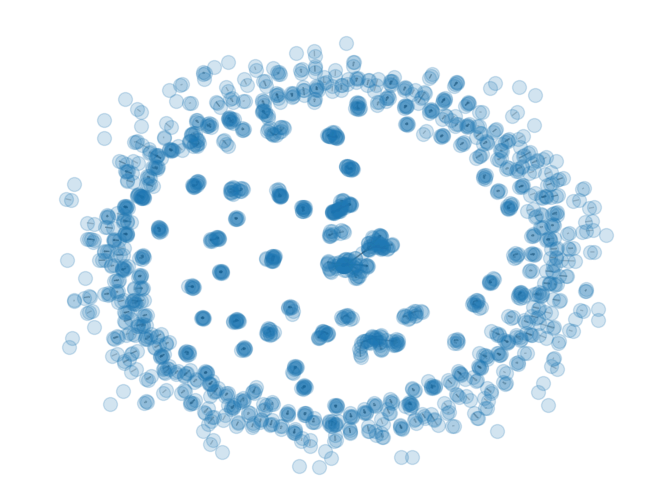

In [269]:
nx.draw(G,pos=pos, node_size=100,alpha=.2)

In [270]:
from networkx.readwrite import json_graph

In [271]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)